In [1]:
#When converting to Python file, change display function to print function

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import torch
from torch.utils.data import Dataset 
import random
import time
import datetime
import random
from transformers import GPT2LMHeadModel, GPT2Config
import numpy as np
from torch.utils.data import random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
import json
import matplotlib.pyplot as plt


In [3]:
BATCH_SIZE = 16

In [4]:
import pandas as pd

data = pd.read_csv('../Dataset/0OYkPK', sep=",", header=None)
data.columns = data.iloc[0]
data = data[1:]
data['full'] = data['sentence1']+ " " + data['sentence2']+ " " + data['sentence3']+ " " + data['sentence4']+ " " + data['sentence5']
data['input'] = data['sentence1']+ " " + data['sentence2']+ " " + data['sentence3']+ " " + data['sentence4']
data

,storyid,storytitle,sentence1,sentence2,sentence3,sentence4,sentence5,full,input
1,8bbe6d11-1e2e-413c-bf81-eaea05f4f1bd,David Drops the Weight,David noticed he had put on a lot of weight re...,He examined his habits to try and figure out t...,He realized he'd been eating too much fast foo...,He stopped going to burger places and started ...,"After a few weeks, he started to feel much bet...",David noticed he had put on a lot of weight re...,David noticed he had put on a lot of weight re...
2,0beabab2-fb49-460e-a6e6-f35a202e3348,Frustration,Tom had a very short temper.,One day a guest made him very angry.,He punched a hole in the wall of his house.,Tom's guest became afraid and left quickly.,Tom sat on his couch filled with regret about ...,Tom had a very short temper. One day a guest m...,Tom had a very short temper. One day a guest m...
3,87da1a22-df0b-410c-b186-439700b70ba6,Marcus Buys Khakis,Marcus needed clothing for a business casual e...,All of his clothes were either too formal or t...,He decided to buy a pair of khakis.,The pair he bought fit him perfectly.,Marcus was happy to have the right clothes for...,Marcus needed clothing for a business casual e...,Marcus needed clothing for a business casual e...
4,2d16bcd6-692a-4fc0-8e7c-4a6f81d9efa9,Different Opinions,Bobby thought Bill should buy a trailer and ha...,Bill thought a truck would be better for what ...,Bobby pointed out two vehicles were much more ...,Bill was set in his ways with conventional thi...,He ended up buying the truck he wanted despite...,Bobby thought Bill should buy a trailer and ha...,Bobby thought Bill should buy a trailer and ha...
5,c71bb23b-7731-4233-8298-76ba6886cee1,Overcoming shortcomings,John was a pastor with a very bad memory.,He tried to memorize his sermons many days in ...,He decided to learn to sing to overcome his ha...,He then made all his sermons into music and sa...,His congregation was delighted and so was he.,John was a pastor with a very bad memory. He t...,John was a pastor with a very bad memory. He t...
...,...,...,...,...,...,...,...,...,...
52661,134e8636-3617-43d8-ba6a-9a11b3b115b1,Flavor,The man liked the flavor.,He tried to recreate it at home.,He could not get the flavor right.,He asked the owner of the recipe for help.,The owner of the flavor sold him the recipe.,The man liked the flavor. He tried to recreate...,The man liked the flavor. He tried to recreate...
52662,4c317f76-ca42-4024-a4c2-12ec911cf89b,After Death,"After my friend's dad's funeral, I got in trou...",The principal said I wasn't allowed to leave s...,He found out I had my friend sign me out.,He told me I was getting detention.,I skipped detention all week.,"After my friend's dad's funeral, I got in trou...","After my friend's dad's funeral, I got in trou..."
52663,a18fd0d2-4d0c-4316-befe-e3d827fe699b,Janice breaks her wrist,Janice was out exercising for her big soccer g...,She was doing some drills with her legs.,While working out and exercising she slips on ...,She falls down and uses her wrist to break her...,She breaks her wrist in the process and goes t...,Janice was out exercising for her big soccer g...,Janice was out exercising for her big soccer g...
52664,2c14252b-4080-4fca-8765-537772018508,Jamie marries for love,Jamie is an american girl.,Jamie wants to get married to a mexican man.,Her family assumes it's because the man wants ...,Jamie insist that she is marrying him out of l...,Jamie gets married and they spent the rest of ...,Jamie is an american girl. Jamie wants to get ...,Jamie is an american girl. Jamie wants to get ...


In [5]:
val_data = pd.read_csv('../Dataset/XWjas1', sep=",", header=None)
val_data.columns = val_data.iloc[0]
val_data = val_data[1:]
#val_data['InputSentence5'] = val_data['RandomFifthSentenceQuiz1']
#val_data['InputSentence5'] = val_data['RandomFifthSentenceQuiz1']
val_data['InputSentence5']  = np.where(val_data['AnswerRightEnding']== '1', val_data['RandomFifthSentenceQuiz1'], val_data['RandomFifthSentenceQuiz2'])
val_data['full'] = val_data['InputSentence1']+ " " + val_data['InputSentence2']+ " " + val_data['InputSentence3']+ " " + val_data['InputSentence4']+ " " + val_data['InputSentence5']
val_data['input'] = val_data['InputSentence1']+ " " + val_data['InputSentence2']+ " " + val_data['InputSentence3']+ " " + val_data['InputSentence4']
val_data

,InputStoryid,InputSentence1,InputSentence2,InputSentence3,InputSentence4,RandomFifthSentenceQuiz1,RandomFifthSentenceQuiz2,AnswerRightEnding,InputSentence5,full,input
1,138d5bfb-05cc-41e3-bf2c-fa85ebad14e2,Rick grew up in a troubled household.,"He never found good support in family, and tur...",It wasn't long before Rick got shot in a robbery.,The incident caused him to turn a new leaf.,He is happy now.,He joined a gang.,1,He is happy now.,Rick grew up in a troubled household. He never...,Rick grew up in a troubled household. He never...
2,bff9f820-9605-4875-b9af-fe6f14d04256,Laverne needs to prepare something for her fri...,She decides to bake a batch of brownies.,She chooses a recipe and follows it closely.,Laverne tests one of the brownies to make sure...,The brownies are so delicious Laverne eats two...,Laverne doesn't go to her friend's party.,1,The brownies are so delicious Laverne eats two...,Laverne needs to prepare something for her fri...,Laverne needs to prepare something for her fri...
3,e8f628d5-9f97-40ed-8611-fc0e774673c4,Sarah had been dreaming of visiting Europe for...,She had finally saved enough for the trip.,She landed in Spain and traveled east across t...,She didn't like how different everything was.,Sarah then decided to move to Europe.,Sarah decided that she preferred her home over...,2,Sarah decided that she preferred her home over...,Sarah had been dreaming of visiting Europe for...,Sarah had been dreaming of visiting Europe for...
4,f5226bfe-9f26-4377-b05f-3d9568dbdec1,Gina was worried the cookie dough in the tube ...,She was very happy to find she was wrong.,The cookies from the tube were as good as from...,Gina intended to only eat 2 cookies and save t...,Gina liked the cookies so much she ate them al...,Gina gave the cookies away at her church.,1,Gina liked the cookies so much she ate them al...,Gina was worried the cookie dough in the tube ...,Gina was worried the cookie dough in the tube ...
5,69ac9b05-b956-402f-9fff-1f926ef9176b,It was my final performance in marching band.,I was playing the snare drum in the band.,We played Thriller and Radar Love.,The performance was flawless.,I was very proud of my performance.,I was very ashamed of my performance.,1,I was very proud of my performance.,It was my final performance in marching band....,It was my final performance in marching band....
...,...,...,...,...,...,...,...,...,...,...,...
1567,9cba37ea-cc3e-4775-b044-c3d3d4983d22,When I was a kid I really wanted to play check...,I sat down with my grandpa and he taught me.,"At first, he was just teaching me but it becam...","As I got older, I continued to play checkers w...",To this day I hate checkers.,I have very fond memories of checkers.,2,I have very fond memories of checkers.,When I was a kid I really wanted to play check...,When I was a kid I really wanted to play check...
1568,a0769cd4-45a0-492c-a566-b14b9b17cba6,Ivy wanted a cell phone like all her friends.,She saved up her money from delivering papers.,Soon she had enough for a phone.,She went shopping and selected the perfect phone.,Amy spent all of her money on clothes.,She loved her new phone.,2,She loved her new phone.,Ivy wanted a cell phone like all her friends. ...,Ivy wanted a cell phone like all her friends. ...
1569,40f3b904-81c7-4e92-b245-ff20840733a2,Dave walked into the grocery store.,He was going there to buy his favorite energy ...,He only had enough money to buy one can.,He reached the aisle and what he saw made him ...,Dave bought an entire case.,They were on sale.,2,They were on sale.,Dave walked into the grocery store. He was goi...,Dave walked into the grocery store. He was goi...
1570,1d3e5ddd-76a9-401d-8c5c-a6f5f0bd7160,Ramona was very unhappy in her job.,"She asked for a raise, but was denied.",The refusal prompted her to aggressively comb ...,She found an interesting new possibility and s...,She was offered the new job at a higher salary.,Ramona had no reason to want to change jobs.,1,She was offered the new job at a 

In [6]:
with torch.cuda.device('cuda:1'):
    torch.cuda.empty_cache()

all_sentences = [x for x in data.full]#[:1000]]

val_sentences = [x for x in val_data.input]#[:1000]]



In [7]:
all_sentences[0:10]


["David noticed he had put on a lot of weight recently. He examined his habits to try and figure out the reason. He realized he'd been eating too much fast food lately. He stopped going to burger places and started a vegetarian diet. After a few weeks, he started to feel much better.",
 "Tom had a very short temper. One day a guest made him very angry. He punched a hole in the wall of his house. Tom's guest became afraid and left quickly. Tom sat on his couch filled with regret about his actions.",
 'Marcus needed clothing for a business casual event. All of his clothes were either too formal or too casual. He decided to buy a pair of khakis. The pair he bought fit him perfectly. Marcus was happy to have the right clothes for the event.',
 "Bobby thought Bill should buy a trailer and haul it with his car. Bill thought a truck would be better for what he needed. Bobby pointed out two vehicles were much more expensive. Bill was set in his ways with conventional thinking. He ended up buyi

In [8]:
from transformers import GPT2Tokenizer
#get pretrained tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2', bos_token='<sos>', pad_token='<pad>', padding_side = 'left')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [9]:
max_len = int(np.max([len(tokenizer.encode(s)) for s in all_sentences]))
print(f"max_len {max_len}")

max_val = int(np.max([len(tokenizer.encode(s)) for s in val_sentences]))
print(f"max_val {max_val}")

max_len 83
max_val 61


In [10]:
def tokenize_seq(sent,tokenizer,max_length):
    return tokenizer('<sos>'+ sent , truncation=True, max_length=max_length, padding="max_length")

class JapanDataset(Dataset):

    def __init__(self, sentences, tokenizer, gpt2_type="gpt2", max_length=max_len):

        self.tokenizer = tokenizer 
        self.input_ids = []
        self.attn_masks = []

        for sentence in sentences:      
            encodings = tokenize_seq(sentence,tokenizer,max_length)

            self.input_ids.append(torch.tensor(encodings['input_ids']))
            self.attn_masks.append(torch.tensor(encodings['attention_mask']))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.attn_masks[idx]   

def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

In [11]:
import gc
gc.collect()

48

In [12]:
#create an instance of Dataset
train_set = JapanDataset(all_sentences, tokenizer, max_length=max_len)
val_set = JapanDataset(val_sentences, tokenizer, max_length=max_val)


#train_set, val_set = random_split(dataset, [train_size, val_size])
#print("train_size :",train_size)
#print("val_size   :",val_size)

gc.collect()

0

In [13]:
print(train_set[0])

(tensor([50258, 50258, 50258, 50258, 50258, 50258, 50258, 50258, 50258, 50258,
        50258, 50258, 50258, 50258, 50258, 50258, 50258, 50258, 50258, 50258,
        50258, 50258, 50257, 11006,  6810,   339,   550,  1234,   319,   257,
         1256,   286,  3463,  2904,    13,   679, 11068,   465, 13870,   284,
         1949,   290,  3785,   503,   262,  1738,    13,   679,  6939,   339,
         1549,   587,  6600,  1165,   881,  3049,  2057, 16537,    13,   679,
         5025,  1016,   284, 26593,  4113,   290,  2067,   257, 24053,  5496,
           13,  2293,   257,  1178,  2745,    11,   339,  2067,   284,  1254,
          881,  1365,    13]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))


In [14]:
#define dataloaders
train_dataloader = DataLoader(train_set,  sampler = RandomSampler(train_set), batch_size = BATCH_SIZE)
validation_dataloader = DataLoader(val_set, sampler = SequentialSampler(val_set), batch_size = BATCH_SIZE )

In [15]:
# Create default config
configuration = GPT2Config.from_pretrained('gpt2', output_hidden_states=False)
# Load pretrained gpt2
model = GPT2LMHeadModel.from_pretrained("gpt2", config=configuration)
model.resize_token_embeddings(len(tokenizer))

# Create device
device = torch.device("cuda:1")
model.to(device)

optimizer = torch.optim.Adam(model.parameters(),lr = 0.0005)
model = model.to(device)

In [16]:
from tqdm import tqdm

#call model with a batch of input
def process_one_batch(batch):
    b_input_ids = batch[0].to(device)
    b_labels = batch[0].to(device)
    b_masks = batch[1].to(device)
    outputs  = model(b_input_ids,  attention_mask = b_masks,labels=b_labels)
    return outputs

#call model with a batch of input
def output_one_batch(batch):
    b_input_ids = batch[0].to(device)
    b_labels = batch[0].to(device)
    b_masks = batch[1].to(device)
    outputs  = model(b_input_ids,  num_beams=5 ,  attention_mask = b_masks,labels=b_labels)
    return outputs

#do one epoch for training
def train_epoch():
    t0 = time.time()
    total_train_loss = 0
    model.train()
    for step, batch in enumerate(tqdm(train_dataloader)):

        model.zero_grad()        
        outputs = process_one_batch( batch)
        loss = outputs[0]  
        batch_loss = loss.item()
        total_train_loss += batch_loss

        loss.backward()
        optimizer.step()


    avg_train_loss = total_train_loss / len(train_dataloader)  
    print("avg_train_loss",avg_train_loss)  
    elapsed_time = format_time(time.time() - t0)
    print("elapsed time for 1 training epoch : ",elapsed_time)
    return avg_train_loss

#do one epoch for eval
def eval_epoch():
    t0 = time.time()
    total_eval_loss = 0
    nb_eval_steps = 0
    # Evaluate data for one epoch
    for batch in validation_dataloader:            

        with torch.no_grad():        
            outputs = process_one_batch(batch)
            loss = outputs[0]              
            batch_loss = loss.item()
            total_eval_loss += batch_loss         

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    print("avg_val_loss",avg_val_loss) 
    elapsed_time = format_time(time.time() - t0)
    print("elapsed time for 1 eval epoch : ",elapsed_time)
    return avg_val_loss
    

#do one epoch for eval
def save_results( num_batches = 15, iter = 0):
    indexes_list = []
    inputs_list = []
    predicted_list = []
    expected_list = []
        
    #for i in tqdm(range(num_examples)):
    for i, batch in enumerate(tqdm(validation_dataloader)):
        if(num_batches != None and i>num_batches):
            break
        # Story is:
        #input_ids = tokenizer(val_data.input.iloc[i], return_tensors='pt')
        #input_ids.to(device)
        b_input_ids = batch[0].to(device)
        
        greedy_output = model.generate(
                b_input_ids,  #check stars   
                num_beams=5 ,
                return_dict_in_generate=True, 
                output_scores=True, 
                max_length=150
                )
        
        print(greedy_output['sequences'].shape)
        output = tokenizer.batch_decode(greedy_output['sequences'])
        len_input = len(val_data.input.iloc[i])
        #output = tokenizer.decode(greedy_output[0], skip_special_tokens=True)
        b_outputs = []
        
        for b_idx in range(BATCH_SIZE):
            if(len(output) <= b_idx):
                break
            idx = BATCH_SIZE * i + b_idx
            end_words = val_data.InputSentence4
            in_words = val_data.input.iloc[idx]
            #if(len(output) <= b_idx):
            #    break
            #b_out = output[b_idx]
            #pred_sent = b_out[b_out.index('<sos>') + len(in_words) + 13:]
            #if(pred_sent.find('.') != -1):
            #    pred_sent = pred_sent[:pred_sent.index('.')+1]
            #else:
            #    pred_sent = pred_sent
            
            indexes_list.append(idx)
            inputs_list.append(val_data.input.iloc[idx])
            predicted_list.append(output[b_idx])
            expected_list.append(val_data.InputSentence5.iloc[idx])
            
    outputs = pd.DataFrame()
    outputs['inputs'] = inputs_list
    outputs['predicted'] = predicted_list
    outputs['expected'] = expected_list
    
    print(outputs[:5])

            
    
    
    data = {}
    data['ex'] = []
    for i in range(len(indexes_list)):
        data['ex'].append({
            'idx': indexes_list[i],
            'input': inputs_list[i],
            'prediction': predicted_list[i],
            'expected': expected_list[i]

        })

    with open('test_cases'+ str(iter)+'.json', 'w') as outfile:
        json.dump(data, outfile)

In [17]:
save_results(1)

  2%|▏         | 1/63 [00:04<04:30,  4.37s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([16, 150])


  3%|▎         | 2/63 [00:08<04:22,  4.30s/it]

torch.Size([16, 150])
                                              inputs  \
0  Rick grew up in a troubled household. He never...   
1  Laverne needs to prepare something for her fri...   
2  Sarah had been dreaming of visiting Europe for...   
3  Gina was worried the cookie dough in the tube ...   
4  It was  my final performance in marching band....   

                                           predicted  \
0  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
1  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
2  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
3  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
4  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   

                                            expected  
0                                   He is happy now.  
1  The brownies are so delicious Laverne eats two...  
2  Sarah decided that she preferred her home over...  
3  Gina liked the cookies so much she ate them al...  
4                I was very p

100%|██████████| 63/63 [00:24<00:00,  2.62it/s]


avg_train_loss 6.265664282299223
elapsed time for 1 training epoch :  0:00:24
avg_val_loss 4.713573039524139
elapsed time for 1 eval epoch :  0:00:05


  2%|▏         | 1/63 [00:04<04:27,  4.31s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([16, 150])


  3%|▎         | 2/63 [00:08<04:22,  4.30s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([16, 150])


  5%|▍         | 3/63 [00:12<04:17,  4.29s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([16, 150])


  6%|▋         | 4/63 [00:17<04:13,  4.30s/it]

torch.Size([16, 150])
                                              inputs  \
0  Rick grew up in a troubled household. He never...   
1  Laverne needs to prepare something for her fri...   
2  Sarah had been dreaming of visiting Europe for...   
3  Gina was worried the cookie dough in the tube ...   
4  It was  my final performance in marching band....   

                                           predicted  \
0  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
1  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
2  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
3  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
4  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   

                                            expected  
0                                   He is happy now.  
1  The brownies are so delicious Laverne eats two...  
2  Sarah decided that she preferred her home over...  
3  Gina liked the cookies so much she ate them al...  
4                I was very p

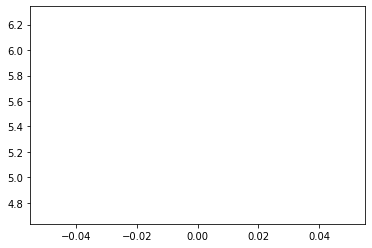

100%|██████████| 63/63 [00:25<00:00,  2.45it/s]


avg_train_loss 3.8900080559745667
elapsed time for 1 training epoch :  0:00:26
avg_val_loss 3.6408316332196433
elapsed time for 1 eval epoch :  0:00:05


  2%|▏         | 1/63 [00:04<04:37,  4.48s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([16, 150])


  3%|▎         | 2/63 [00:08<04:29,  4.43s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([16, 150])


  5%|▍         | 3/63 [00:13<04:23,  4.38s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([16, 150])


  6%|▋         | 4/63 [00:17<04:18,  4.39s/it]

torch.Size([16, 150])
                                              inputs  \
0  Rick grew up in a troubled household. He never...   
1  Laverne needs to prepare something for her fri...   
2  Sarah had been dreaming of visiting Europe for...   
3  Gina was worried the cookie dough in the tube ...   
4  It was  my final performance in marching band....   

                                           predicted  \
0  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
1  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
2  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
3  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
4  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   

                                            expected  
0                                   He is happy now.  
1  The brownies are so delicious Laverne eats two...  
2  Sarah decided that she preferred her home over...  
3  Gina liked the cookies so much she ate them al...  
4                I was very p

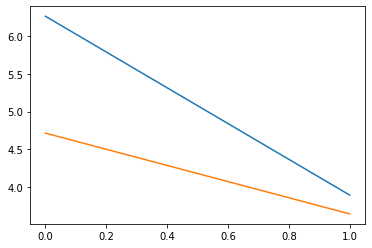

100%|██████████| 63/63 [00:25<00:00,  2.46it/s]


avg_train_loss 2.6023035427880665
elapsed time for 1 training epoch :  0:00:26
avg_val_loss 2.847615680997334
elapsed time for 1 eval epoch :  0:00:05


  2%|▏         | 1/63 [00:04<04:35,  4.45s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([16, 150])


  3%|▎         | 2/63 [00:08<04:26,  4.38s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([16, 150])


  5%|▍         | 3/63 [00:13<04:22,  4.37s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([16, 150])


  6%|▋         | 4/63 [00:17<04:17,  4.37s/it]

torch.Size([16, 150])
                                              inputs  \
0  Rick grew up in a troubled household. He never...   
1  Laverne needs to prepare something for her fri...   
2  Sarah had been dreaming of visiting Europe for...   
3  Gina was worried the cookie dough in the tube ...   
4  It was  my final performance in marching band....   

                                           predicted  \
0  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
1  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
2  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
3  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
4  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   

                                            expected  
0                                   He is happy now.  
1  The brownies are so delicious Laverne eats two...  
2  Sarah decided that she preferred her home over...  
3  Gina liked the cookies so much she ate them al...  
4                I was very p

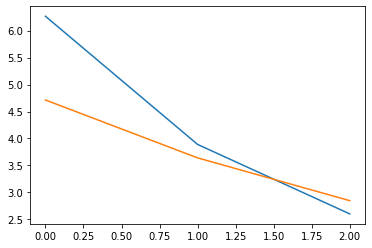

100%|██████████| 63/63 [00:25<00:00,  2.46it/s]


avg_train_loss 2.053670712879726
elapsed time for 1 training epoch :  0:00:26
avg_val_loss 2.7081408992646234
elapsed time for 1 eval epoch :  0:00:05


  2%|▏         | 1/63 [00:04<04:33,  4.41s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([16, 150])


  3%|▎         | 2/63 [00:08<04:25,  4.35s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([16, 150])


  5%|▍         | 3/63 [00:13<04:20,  4.34s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([16, 150])


  6%|▋         | 4/63 [00:17<04:16,  4.34s/it]

torch.Size([16, 150])
                                              inputs  \
0  Rick grew up in a troubled household. He never...   
1  Laverne needs to prepare something for her fri...   
2  Sarah had been dreaming of visiting Europe for...   
3  Gina was worried the cookie dough in the tube ...   
4  It was  my final performance in marching band....   

                                           predicted  \
0  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
1  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
2  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
3  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
4  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   

                                            expected  
0                                   He is happy now.  
1  The brownies are so delicious Laverne eats two...  
2  Sarah decided that she preferred her home over...  
3  Gina liked the cookies so much she ate them al...  
4                I was very p

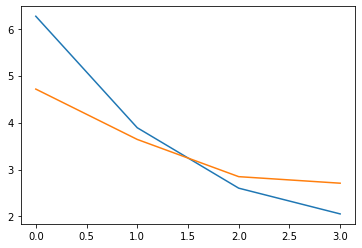

100%|██████████| 63/63 [00:25<00:00,  2.47it/s]


avg_train_loss 1.773395027433123
elapsed time for 1 training epoch :  0:00:25
avg_val_loss 2.6944814295995805
elapsed time for 1 eval epoch :  0:00:05


  2%|▏         | 1/63 [00:04<04:34,  4.43s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([16, 150])


  3%|▎         | 2/63 [00:08<04:25,  4.35s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([16, 150])


  5%|▍         | 3/63 [00:13<04:19,  4.32s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([16, 150])


  6%|▋         | 4/63 [00:17<04:15,  4.33s/it]

torch.Size([16, 150])
                                              inputs  \
0  Rick grew up in a troubled household. He never...   
1  Laverne needs to prepare something for her fri...   
2  Sarah had been dreaming of visiting Europe for...   
3  Gina was worried the cookie dough in the tube ...   
4  It was  my final performance in marching band....   

                                           predicted  \
0  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
1  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
2  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
3  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
4  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   

                                            expected  
0                                   He is happy now.  
1  The brownies are so delicious Laverne eats two...  
2  Sarah decided that she preferred her home over...  
3  Gina liked the cookies so much she ate them al...  
4                I was very p

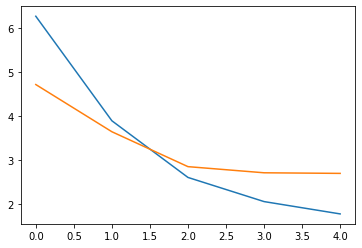

100%|██████████| 63/63 [00:25<00:00,  2.49it/s]


avg_train_loss 1.5442789528104994
elapsed time for 1 training epoch :  0:00:25
avg_val_loss 2.760128078006563
elapsed time for 1 eval epoch :  0:00:05


  2%|▏         | 1/63 [00:04<04:34,  4.43s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([16, 150])


  3%|▎         | 2/63 [00:08<04:25,  4.36s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([16, 150])


  5%|▍         | 3/63 [00:13<04:19,  4.33s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([16, 150])


  6%|▋         | 4/63 [00:17<04:15,  4.34s/it]

torch.Size([16, 150])
                                              inputs  \
0  Rick grew up in a troubled household. He never...   
1  Laverne needs to prepare something for her fri...   
2  Sarah had been dreaming of visiting Europe for...   
3  Gina was worried the cookie dough in the tube ...   
4  It was  my final performance in marching band....   

                                           predicted  \
0  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
1  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
2  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
3  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   
4  <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad...   

                                            expected  
0                                   He is happy now.  
1  The brownies are so delicious Laverne eats two...  
2  Sarah decided that she preferred her home over...  
3  Gina liked the cookies so much she ate them al...  
4                I was very p

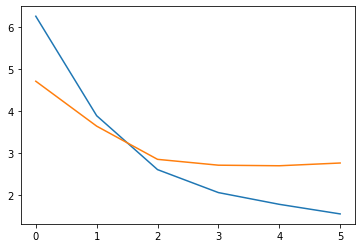

100%|██████████| 63/63 [00:25<00:00,  2.48it/s]


avg_train_loss 1.3345899335921756
elapsed time for 1 training epoch :  0:00:25


KeyboardInterrupt: 

In [18]:
train_loss = []
val_loss = []
for i in range(15):
    train_loss.append(train_epoch())
    val_loss.append(eval_epoch())
    if(i<7):
        save_results(10, i)
    else:
        save_results(100, i)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.show()
    plt.savefig('losses.png')

save_results(None)

##### 